<a href="https://colab.research.google.com/github/NatashaB-randao/Formacao-Machine-Learning-Specialist/blob/main/ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

import tensorflow as tf
from tensorflow import keras

import io

In [3]:
tf.__version__

'2.17.1'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 33ms/step - accuracy: 0.8986 - loss: 0.3311
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.9854 - loss: 0.0474
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9900 - loss: 0.0339
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9927 - loss: 0.0224
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9935 - loss: 0.0194


In [10]:
import numpy as np

y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1) # Get class labels with highest probability

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [11]:
classes=[0,1,2,3,4,5,6,7,8,9]

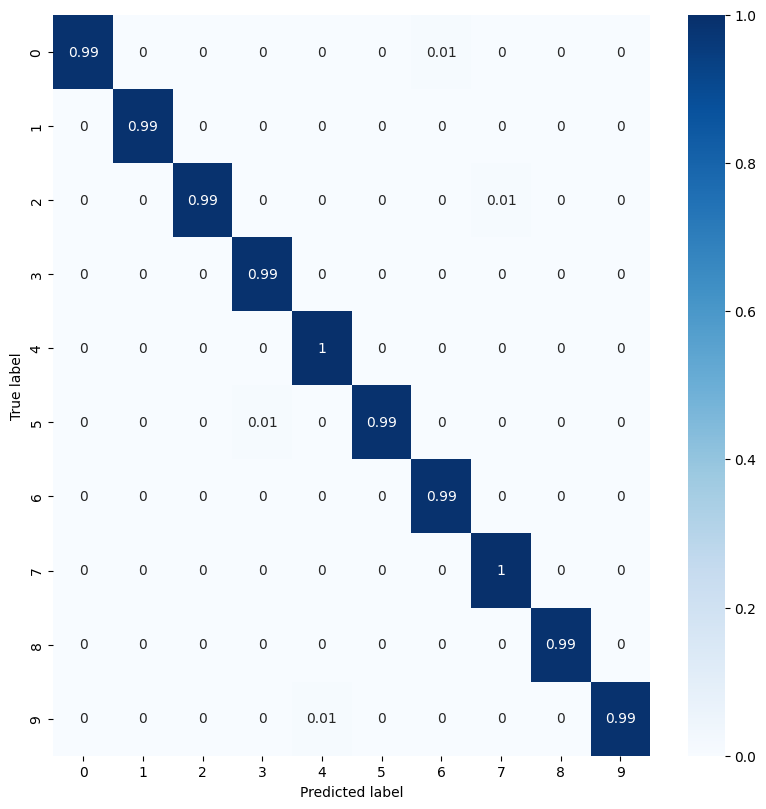

In [12]:
con_mat = tf.math.confusion_matrix(labels=y_true,predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
# Corrected: Adding layers to model1 instead of model
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(train_images, train_labels, epochs=5, callbacks=[tensorboard_callback])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.8850 - loss: 0.3697
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9827 - loss: 0.0535
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9876 - loss: 0.0375
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9916 - loss: 0.0284
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9932 - loss: 0.0210


In [14]:
file_writer = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  test_pred_raw = model1.predict(test_images)
  test_pred = np.argmax(test_pred_raw, axis=1)

  con_mat = tf.math.confusion_matrix(labels=test_labels,predictions=test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  buf = io.BytesIO()
  plt.savefig(buf, format='png')

  plt.close(figure)
  buf.seek(0)
  imagel = tf.image.decode_png(buf.getvalue(), channels=4)
  imagel = tf.expand_dims(imagel, 0)


  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", imagel, step=epoch)


logdir = 'logs/images'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [15]:
model1.fit(
    train_images,
    train_labels,
    epochs=5, callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9941 - loss: 0.0183 - val_accuracy: 0.9909 - val_loss: 0.0288
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9917 - val_loss: 0.0240
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 36ms/step - accuracy: 0.9963 - loss: 0.0109 - val_accuracy: 0.9924 - val_loss: 0.0269
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9970 - loss: 0.0094 - val_accuracy: 0.9923 - val_loss: 0.0293
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9969 - loss: 0.0095 - val_accuracy: 0.9907 - val_loss: 0.0351


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


# Calcular as métricas
def calcular_metricas(y_true, y_pred):
  # Calculando Matriz de Confusão
  con_mat = confusion_matrix(y_true, y_pred)

  # Extrair valores da matriz de confusão
  VP = np.diag(con_mat)
  FN = np.sum(con_mat, axis=1) - VP
  FP = np.sum(con_mat, axis=0) - VP
  VN = np.sum(con_mat) - (VP + FN + FP)

  # Calcular métricas
  acuracia = (VP + VN) / (VP + VN + FP + FN)
  sensibilidade = VP / (VP + FN)
  especificidade = VN / (VN + FP)
  precisao = VP / (VP + FP)
  f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

  # Resultados
  print("Métricas de Avaliação:")
  print(f"Acurácia: {acuracia.mean():.4f}")
  print(f"Sensibilidade (Recall): {sensibilidade.mean():.4f}")
  print(f"Especificidade: {especificidade.mean():.4f}")
  print(f"Precisão: {precisao.mean():.4f}")
  print(f"F-Score: {f_score.mean():.4f}")

  return {
      'Acurácia': acuracia.mean(),
      'Sensibilidade': sensibilidade.mean(),
      'Especificidade': especificidade.mean(),
      'Precisão': precisao.mean(),
      'F-Score': f_score.mean()
  }


# Predição com o modelo
y_pred = np.argmax(model1.predict(test_images), axis=-1)

# Calcular as métricas
metricas = calcular_metricas(test_labels, y_pred)



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Métricas de Avaliação:
Acurácia: 0.9981
Sensibilidade (Recall): 0.9905
Especificidade: 0.9990
Precisão: 0.9908
F-Score: 0.9906


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


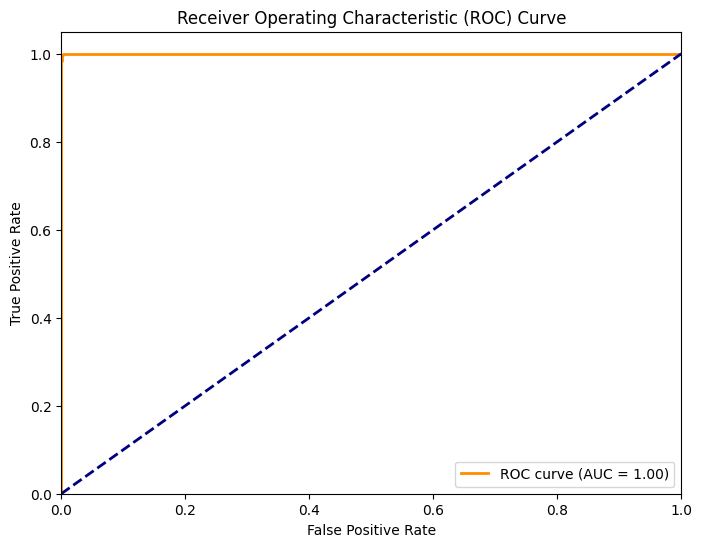

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assumindo que você tem as previsões probabilísticas do seu modelo
y_pred_prob = model.predict(test_images)  # Probabilidades para cada classe


# A variável 'y_true' contém os rótulos reais (test_labels), e 'y_pred_prob' contém as probabilidades preditas.

# Considerando a classe "1" como positiva (classe 1 vs não classe 1)
y_true_bin = (test_labels == 1).astype(int)  # 1 para classe 1, 0 para outras classes
y_pred_class_1 = y_pred_prob[:, 1]  # Probabilidade de ser a classe "1" (índice 1)

# Calcular as taxas FPR e TPR
fpr, tpr, thresholds = roc_curve(y_true_bin, y_pred_class_1)

# Calcular a AUC (Área sob a curva)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Este gráfico mostra uma Curva Característica de Operação do Receptor (ROC) para um modelo de classificação binária. Vamos desmembrar o que ele representa:

Eixo X (False Positive Rate - Taxa de Falsos Positivos): Representa a proporção de exemplos negativos classificados incorretamente como positivos. Um valor de 0 indica que nenhum negativo foi classificado como positivo, enquanto 1 indica que todos os negativos foram classificados como positivos.

Eixo Y (True Positive Rate - Taxa de Verdadeiros Positivos): Representa a proporção de exemplos positivos classificados corretamente como positivos. Um valor de 0 indica que nenhum positivo foi classificado como positivo, enquanto 1 indica que todos os positivos foram classificados como positivos. Também é conhecido como Sensibilidade ou Recall.

Curva Laranja (ROC curve): Esta curva traça o desempenho do modelo em diferentes limiares de classificação. Cada ponto na curva representa um par (Taxa de Falsos Positivos, Taxa de Verdadeiros Positivos) para um determinado limiar. A curva ideal seria uma linha reta que parte da origem (0,0) e vai até (0,1) e (1,1), representando um classificador perfeito.

Área sob a Curva (AUC - Area Under the Curve): O valor de AUC = 1.00 indica que a área sob a curva laranja é igual a 1. Isso representa um classificador perfeito. Um AUC de 0.5 indica um classificador aleatório, sem poder de predição melhor do que o acaso. Valores entre 0.5 e 1 indicam modelos com diferentes níveis de desempenho.

Linha Pontilhada Azul: Representa a linha de um classificador aleatório. Qualquer curva ROC que fique abaixo dessa linha indica um modelo pior do que o acaso.

Interpretação do Gráfico:

Neste caso específico, a curva ROC está praticamente sobreposta ao canto superior esquerdo do gráfico. Isso significa que:

O modelo tem uma Taxa de Verdadeiros Positivos (sensibilidade) próxima de 100%.

A Taxa de Falsos Positivos é próxima de 0.

Um AUC de 1.00 é excepcionalmente bom, indicando um modelo de classificação binária quase perfeito. Na prática, é muito raro obter um AUC de 1.00, e isso pode sugerir problemas na avaliação do modelo, como sobreajuste (overfitting) ou dados sintéticos muito bem separados. É importante investigar se há algum problema na forma como o modelo foi treinado ou avaliado.

Em resumo, o gráfico indica um modelo com desempenho excepcionalmente alto em classificação binária, mas a perfeição alcançada deve ser analisada cuidadosamente para garantir que não seja um artefato de sobreajuste ou erro na metodologia.